<a href="https://colab.research.google.com/github/Aayush3466/NeuralNetwork/blob/main/Visualizationoftrainingdta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#importing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [33]:
#network para

NUM_CLASSES = 10

#reshaping 28x28 pixel images to flatten of 784 pixels
RESHAPED = 784

#number of neurons in a hidden layer
HIDDEN_NEURONS= 256

IMG_ROWS , IMG_COLS = 28 , 28 #imput image dimensions

In [34]:
#laoding the dataset
fashion_data = tf.keras.datasets.fashion_mnist

#splitting between 60,000 train and 10,000 test spamples

(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

train_images = train_images.reshape(60000, RESHAPED)
test_images = test_images.reshape(10000, RESHAPED)

train_images, test_images = train_images/255.0, test_images/255.0




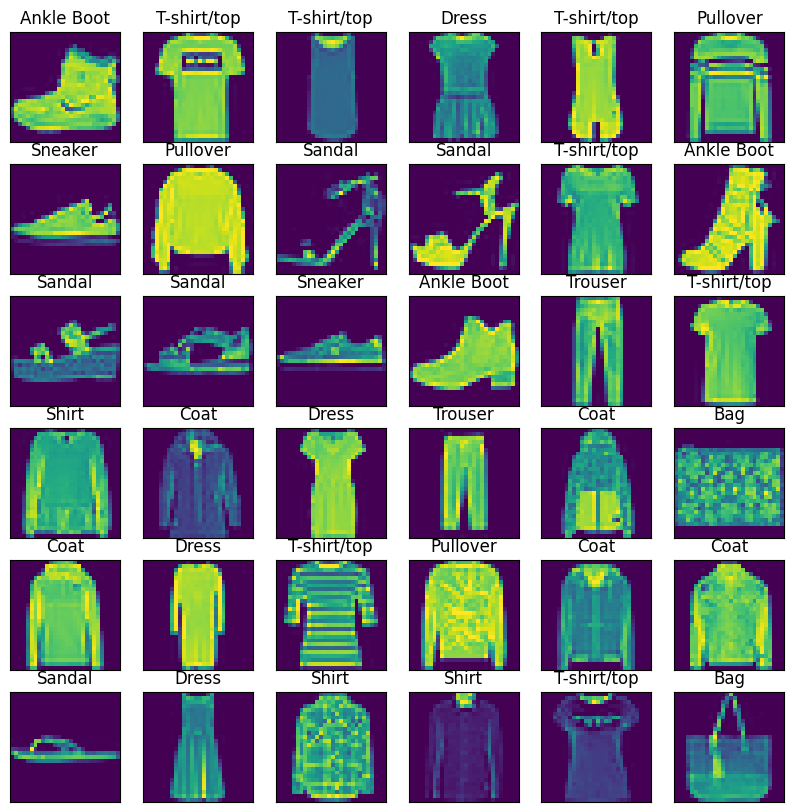

In [36]:
#create a  dictionary for each type of label

labels = {0: "T-shirt/top", 1: "Trouser", 2:"Pullover",3:"Dress", 4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",
          8:"Bag",9:"Ankle Boot"}

plt.figure(figsize=(10,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i].reshape((IMG_ROWS,IMG_COLS)))
  label_index=train_labels[i]
  plt.title(labels[label_index])
plt.show()

In [37]:
#one hot representation of labels

train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)

In [38]:
#defining the architecture of models

class cnn_fmnist:
  @staticmethod
  def build(input_shape, classes):

    model= Sequential([
        Dense(HIDDEN_NEURONS , input_shape= input_shape, name= 'Dense_layer1', activation = 'relu'),
        Dense(HIDDEN_NEURONS , name= 'Dense_layer2', activation = 'relu'),
        Dense(classes, name='output_layer', activation='softmax')

    ])
    return model

In [40]:
#initial optimizer

model= cnn_fmnist.build(input_shape= (RESHAPED,), classes = NUM_CLASSES)

#compile the model
model.compile(optimizer= 'Adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_layer1 (Dense)        (None, 256)               200960    
                                                                 
 Dense_layer2 (Dense)        (None, 256)               65792     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
#trainning the model

BATCH_SIZE = 128
EPOCHS = 200
VALIDATION_SPLIT = 0.2 #how much of the training set is reserved for validation


In [42]:
history=model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 3s 6ms/step - loss: 0.5223 - accuracy: 0.8174 - val_loss: 0.4054 - val_accuracy: 0.8517
Epoch 2/200
375/375 [==============================] - 1s 4ms/step - loss: 0.3718 - accuracy: 0.8655 - val_loss: 0.3734 - val_accuracy: 0.8688
Epoch 3/200
375/375 [==============================] - 1s 4ms/step - loss: 0.3326 - accuracy: 0.8789 - val_loss: 0.3400 - val_accuracy: 0.8784
Epoch 4/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3021 - accuracy: 0.8887 - val_loss: 0.3426 - val_accuracy: 0.8773
Epoch 5/200
375/375 [==============================] - 1s 4ms/step - loss: 0.2854 - accuracy: 0.8940 - val_loss: 0.3279 - val_accuracy: 0.8822
Epoch 6/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2680 - accuracy: 0.8998 - val_loss: 0.3153 - val_accuracy: 0.8865
Epoch 7/200
375/375 [==============================] - 1s 4ms/step - loss: 0.2584 - accuracy: 0.9032 - val_loss: 0.3332 - val_accuracy: 0.8795

In [43]:
score = model.evaluate(test_images, test_labels)
print("\n Testscore: ", score[0])
print('Test accuracy: ', score[1])


313/313 [==============================] - 1s 2ms/step - loss: 1.2870 - accuracy: 0.8919

 Testscore:  1.2870162725448608
Test accuracy:  0.8919000029563904


Text(0.5, 1.0, 'Train - Accuracy')

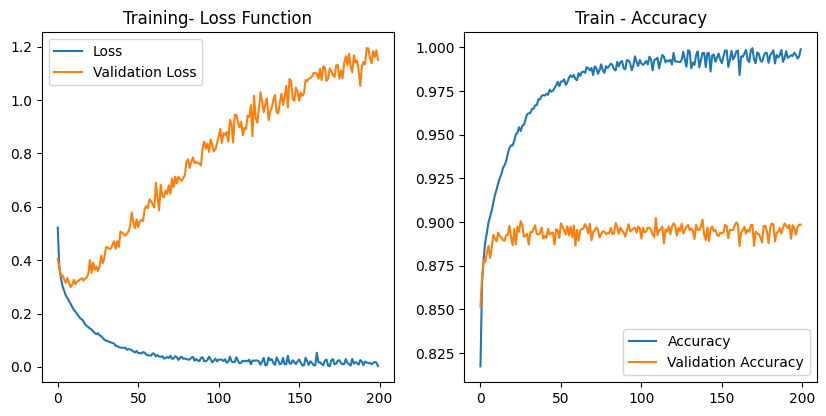

In [44]:
#plot the loss and accuracy functions for the training and validation sets

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training- Loss Function')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'], label= 'Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [49]:
#get the predictions for the test data , convert to an integer cvalue between 0 and 9

predicted_classes = np.around(model.predict(test_images))
predicted_classes= np.argmax(predicted_classes,axis=1)

#get the indeces to be plotted
if test_labels.ndim==2:
  test_labels = np.argmax(test_labels,axis=1)

correct = np.nonzero(predicted_classes==test_labels)[0]
incorrect = np.nonzero(predicted_classes!= test_labels)[0]

313/313 [==============================] - 1s 2ms/step


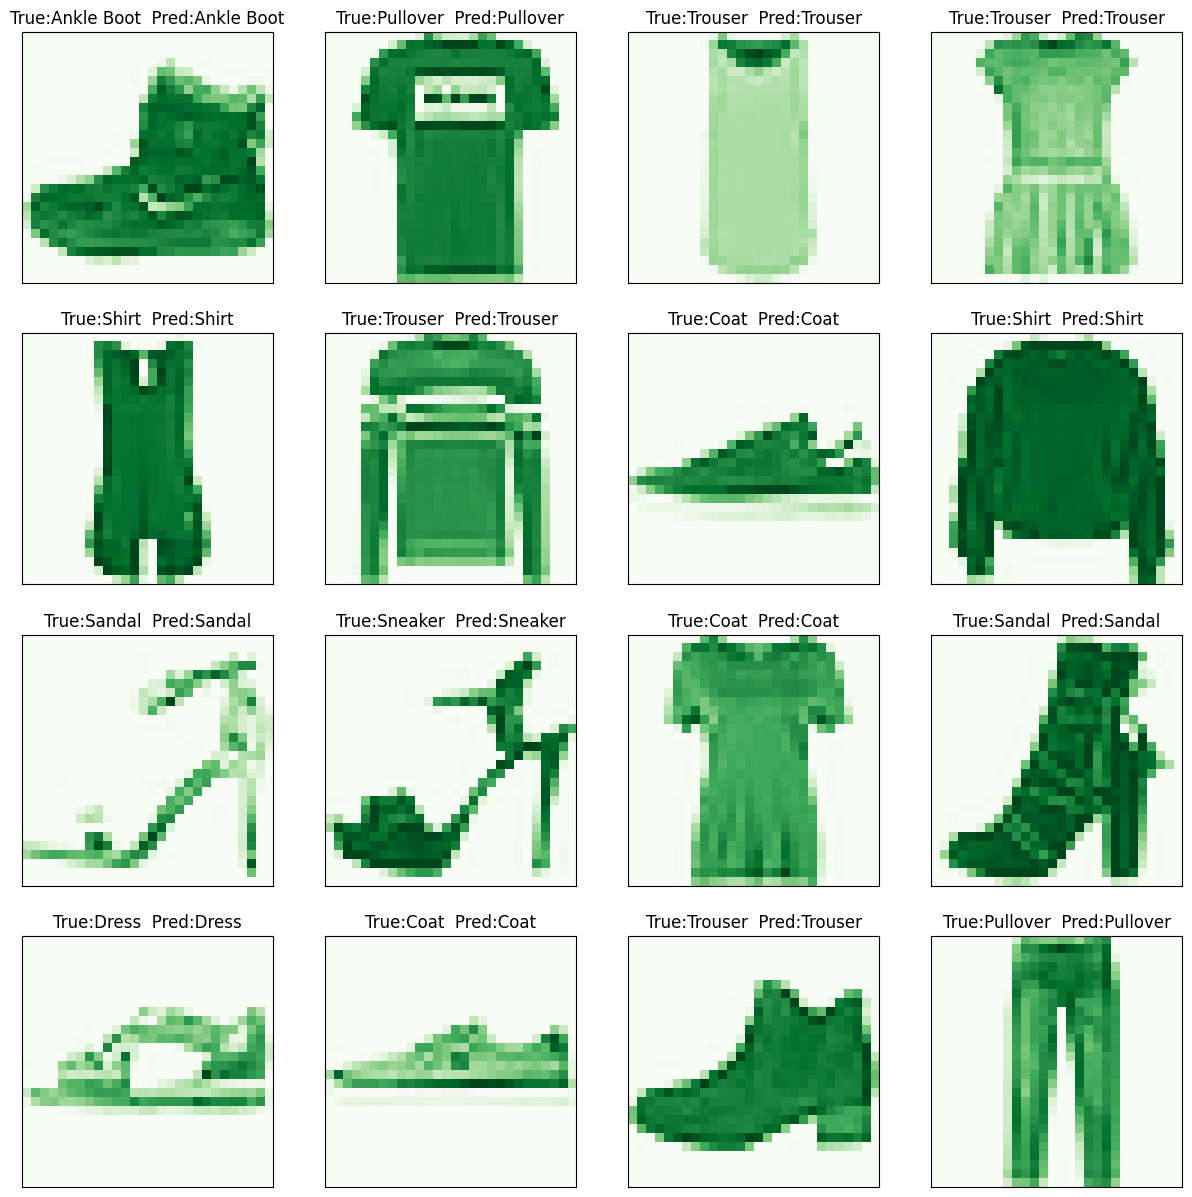

In [50]:
#correctly predicted
plt.figure(figsize=(15,15))
for i, indx in enumerate(correct[:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[indx].reshape((IMG_ROWS,IMG_COLS)),cmap="Greens")
  label_index=train_labels[indx]
  plt.title("True:{}  Pred:{}".format(labels[test_labels[indx]],labels[predicted_classes[indx]]))
plt.show()

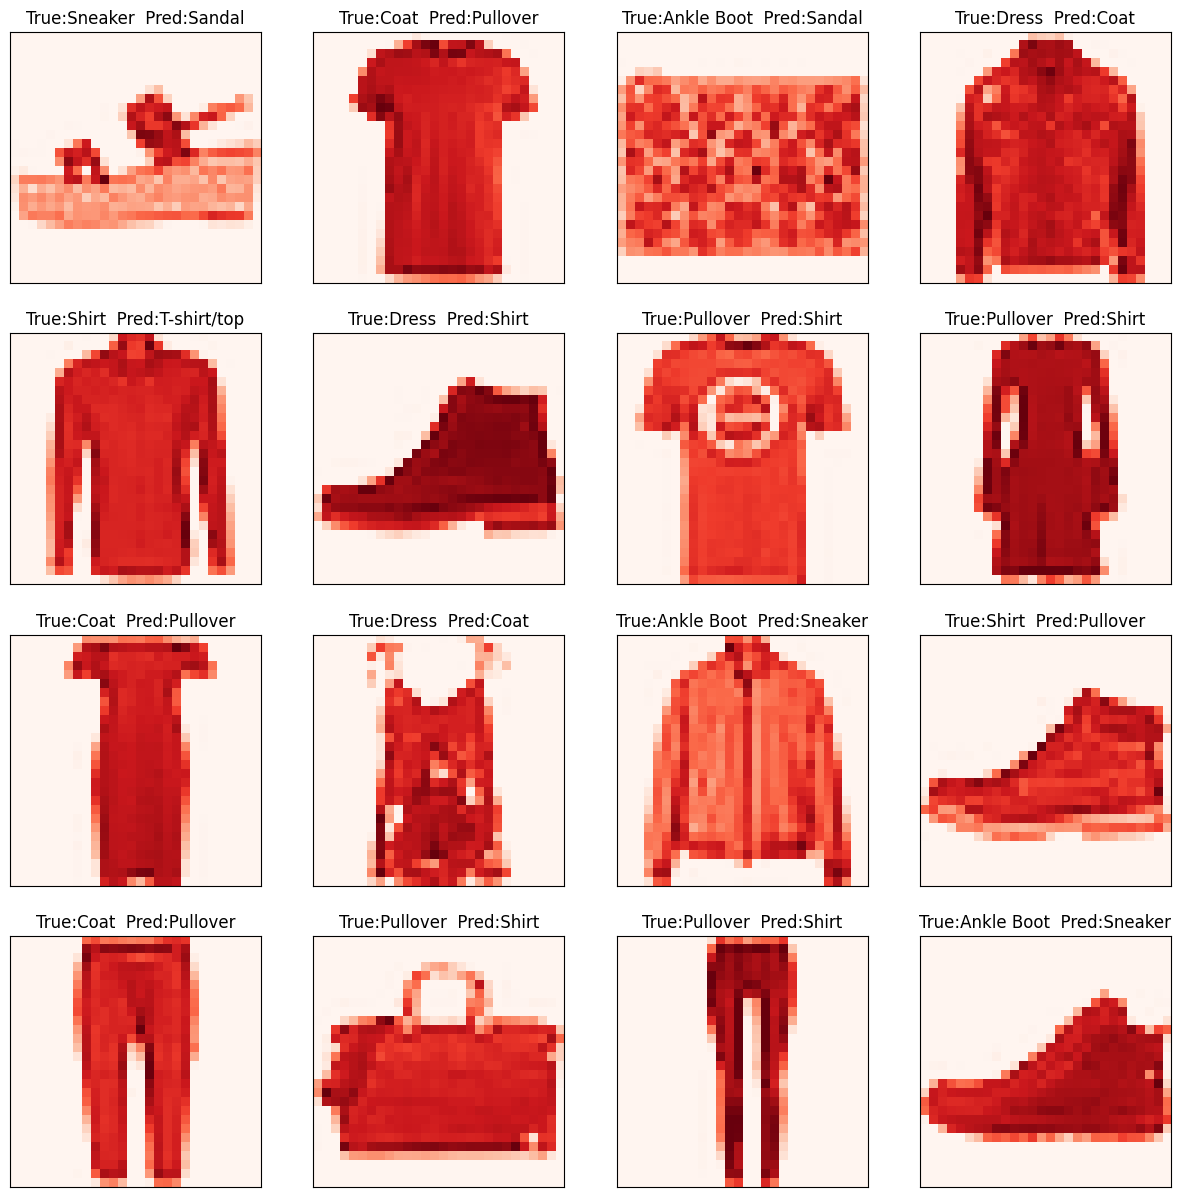

In [51]:
#incorrectly predicted

plt.figure(figsize=(15,15))
for i, indx in enumerate(incorrect[:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[indx].reshape((IMG_ROWS,IMG_COLS)),cmap="Reds")
  label_index=train_labels[indx]
  plt.title("True:{}  Pred:{}".format(labels[test_labels[indx]],labels[predicted_classes[indx]]))
plt.show()